# FEATURE ENGINEERING
# FEATURE TRANSFORMATIONS 

# FUNCTION TRANSFORMER

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.compose import ColumnTransformer

import seaborn as  sns


In [5]:
data = sns.load_dataset("titanic")

In [6]:
df = pd.DataFrame(data)
df.sample(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
506,1,2,female,33.0,0,2,26.0,S,Second,woman,False,NaN,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0,S,First,man,True,B,Southampton,no,True
546,1,2,female,19.0,1,0,26.0,S,Second,woman,False,NaN,Southampton,yes,False


In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
df =df[['age','fare','survived']]

In [9]:
df.head()

,age,fare,survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [10]:
# odler way df['age'].fillna(df['age'].mean(),inplace=True)
# new way
df.fillna({'age': df['age'].mean()}, inplace=True)

In [11]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

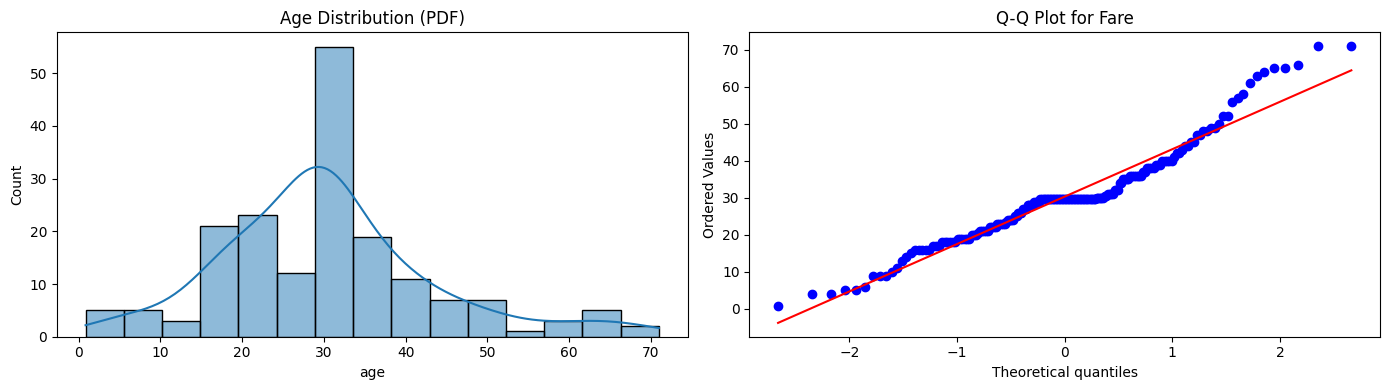

In [13]:
plt.figure(figsize=(14, 4))

# First subplot - Age distribution (use histplot instead of displot)
plt.subplot(1, 2, 1)
sns.histplot(x_test['age'], kde=True)  # Using histplot for subplots
plt.title("Age Distribution (PDF)")


# Second subplot - QQ plot for fare
plt.subplot(1, 2, 2)
stats.probplot(x_test['age'], dist="norm", plot=plt)  # Using same dataset (x_test)
plt.title("Q-Q Plot for Fare")

plt.tight_layout()  # Prevent overlapping
plt.show()

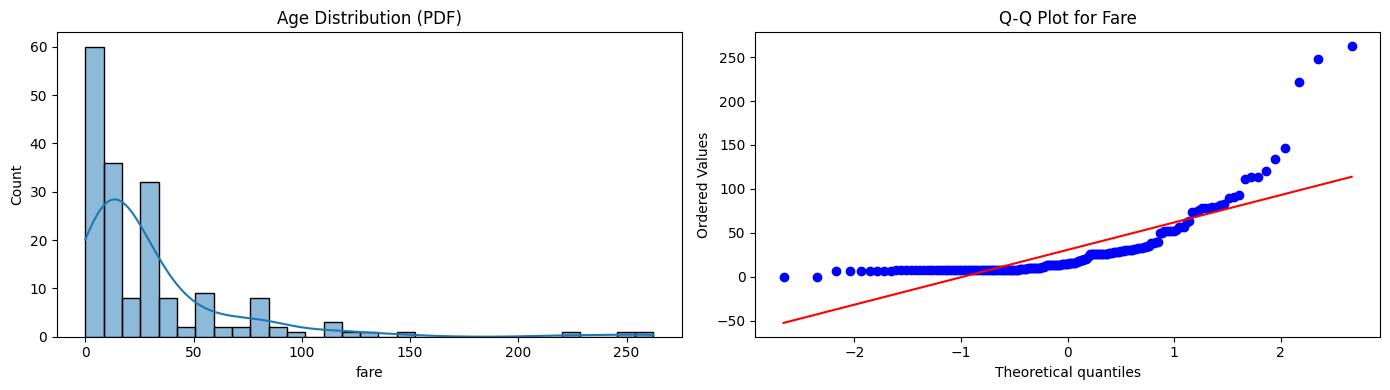

In [14]:
plt.figure(figsize=(14, 4))

# First subplot - Age distribution (use histplot instead of displot)
plt.subplot(1, 2, 1)
sns.histplot(x_test['fare'], kde=True)  # Using histplot for subplots
plt.title("Age Distribution (PDF)")


# Second subplot - QQ plot for fare
plt.subplot(1, 2, 2)
stats.probplot(x_test['fare'], dist="norm", plot=plt)  # Using same dataset (x_test)
plt.title("Q-Q Plot for Fare")

plt.tight_layout()  # Prevent overlapping
plt.show()

before transformations

In [15]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [16]:
clf.fit(x_train,y_train)
clf2.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [17]:
y_pred = clf.predict(x_test)
y_pred1 = clf2.predict(x_test)

print("Accuracy LR : ",accuracy_score(y_test,y_pred)*100)
print("Accuracy DT : ",accuracy_score(y_test,y_pred1)*100)

Accuracy LR :  64.80446927374301
Accuracy DT :  68.15642458100558


# after applying transformations

In [18]:
trf = FunctionTransformer(func=np.log1p)

In [19]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.fit_transform(x_test)

In [20]:
clf.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)

y_pred = clf.predict(x_test_transformed)
y_pred1 = clf2.predict(x_test_transformed)

print("Accuracy LR : ",accuracy_score(y_test,y_pred)*100)
print("Accuracy DT : ",accuracy_score(y_test,y_pred1)*100)

Accuracy LR :  68.15642458100558
Accuracy DT :  68.71508379888269


improvement seen in logistic regression

In [21]:
x_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

# doing cross validation score 

print("LR",np.mean(cross_val_score(clf,x_transformed,Y,scoring="accuracy",cv=10)))
print("DT",np.mean(cross_val_score(clf1,x_transformed,Y,scoring="accuracy",cv=10)))


LR 0.678027465667915
DT 0.6611235955056181


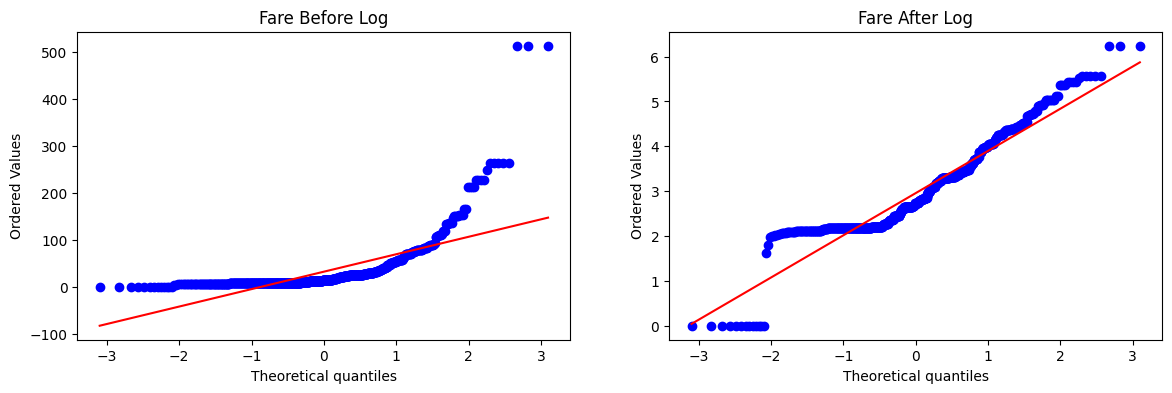

In [22]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

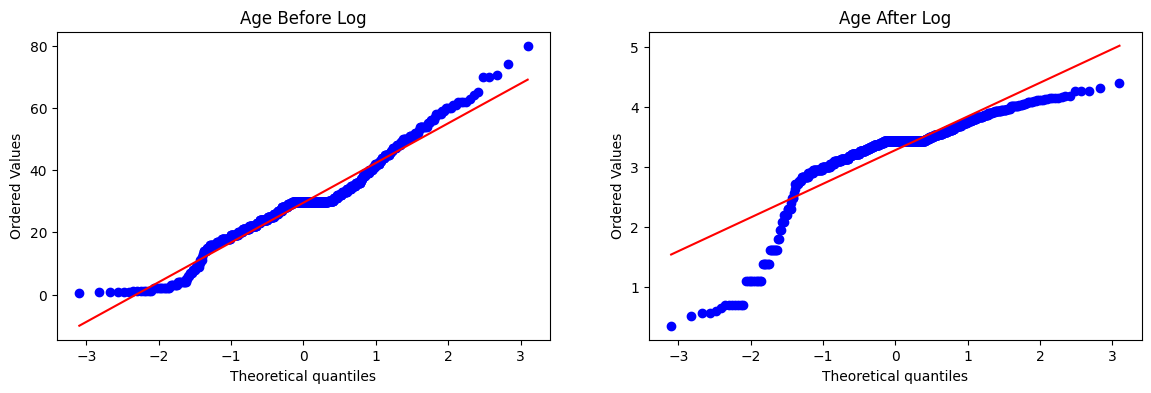

In [23]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [24]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(x_train)
X_test_transformed2 = trf2.transform(x_test)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,Y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,Y,scoring='accuracy',cv=10)))

Accuracy LR 0.6703910614525139
Accuracy DT 0.659217877094972
LR 0.6712609238451936
DT 0.6599750312109862


In [27]:
def apply_transform(transform):
    X = df.iloc[:,0:2]
    y = df.iloc[:,-1]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,-2], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.61729088639201


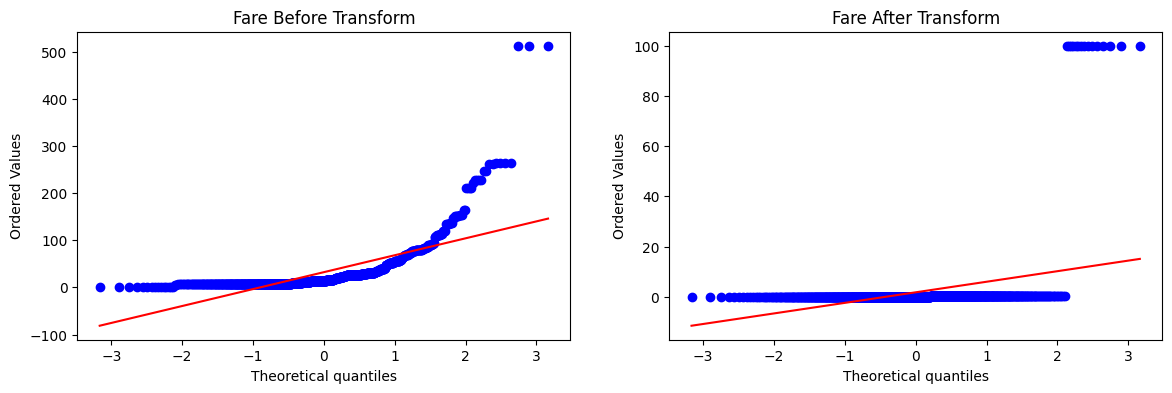

In [36]:
apply_transform(lambda x : 1/(x+0.01))